In [1]:
using QuantumDynamics
using Plots

In [2]:
const thz2au = 0.0001519828500716
const invcm2au = 4.55633e-6
const au2fs = 0.02418884254

0.02418884254

In [3]:
threshold = 1e-10
nsteps = 1000
dt = 1000 / au2fs / nsteps
N = 4
β = 1 / (300 * 3.16683e-6)

Jw = SpectralDensities.DrudeLorentz(; λ=100.0*invcm2au, γ=50.0*invcm2au, Δs=1.0)

QuantumDynamics.SpectralDensities.DrudeLorentz(0.00045563300000000005, 0.00022781650000000002, 1.0, 0.22781650000000003, false)

In [4]:
ϵb = 600 * invcm2au

H0 = Matrix{ComplexF64}(zeros(N, N))
ρ0 = Matrix{ComplexF64}(zeros(N, N))
ρ0[1, 1] = 1.0 

for i in 1:N
    if i <= N-1
        H0[i, i+1] = ϵb
    end
    if i >= 2
        H0[i, i-1] = ϵb
    end
end
H0

4×4 Matrix{ComplexF64}:
       0.0+0.0im  0.0027338+0.0im        0.0+0.0im        0.0+0.0im
 0.0027338+0.0im        0.0+0.0im  0.0027338+0.0im        0.0+0.0im
       0.0+0.0im  0.0027338+0.0im        0.0+0.0im  0.0027338+0.0im
       0.0+0.0im        0.0+0.0im  0.0027338+0.0im        0.0+0.0im

In [5]:
sys_ops = Vector{Matrix{ComplexF64}}()

λs = repeat([35.0], 4) * invcm2au
γs = 1 ./ (repeat([50.0], 4) ./ au2fs)
JwD = Vector{SpectralDensities.DrudeLorentz}()
sys_ops = Vector{Matrix{ComplexF64}}()

for (j, (λ, γ)) in enumerate(zip(λs, γs)) 
    push!(JwD, SpectralDensities.DrudeLorentz(; λ, γ, Δs=1.0))
    op = zeros(N, N)
    op[j, j] = 1.0
    push!(sys_ops, op)
end

In [6]:
th, ρh = HEOM.propagate(; Hamiltonian=H0, ρ0=ρ0, Jw=JwD, β=β, ntimes=nsteps, dt=dt, sys_ops=sys_ops, num_modes=2, Lmax=3, scaled=true, threshold=1e-10, extraargs=Utilities.DiffEqArgs(; reltol=1e-6, abstol=1e-6))

([0.0, 41.34137457575099, 82.68274915150198, 124.02412372725297, 165.36549830300396, 206.70687287875495, 248.04824745450594, 289.38962203025693, 330.7309966060079, 372.0723711817589  …  40969.30220456923, 41010.643579144984, 41051.984953720734, 41093.32632829648, 41134.66770287223, 41176.00907744798, 41217.35045202373, 41258.69182659949, 41300.03320117524, 41341.37457575099], [1.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.9872974791610732 + 0.0im -4.8910217844199705e-6 - 0.11177389400398668im -0.0063222712020160445 + 3.45828851163838e-7im 1.4096996786844334e-8 + 0.0002384712261944245im; … ; 0.18403405168471346 + 0.0im -0.1598542494457775 + 0.0008954395505407896im 0.06578869411093667 + 0.0008531780926443987im -0.006072831397401992 + 0.03683772437861im; 0.18471860264176793 + 0.0im -0.15992528519104787 + 0.004790181339071411im 0.07458798356723756 + 0.0007487527416866211im -0.006108373197056735 + 0.030345585555611135im;;; 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; -4.89102178441

In [7]:
fbU = Propagators.calculate_bare_propagators(; Hamiltonian=H0, dt=dt, ntimes=nsteps)
t, ρ = TTM.propagate(; fbU=fbU, Jw=[Jw], β=β, ρ0=ρ0, dt=dt, ntimes=nsteps, rmax=1, extraargs=QuAPI.QuAPIArgs(), path_integral_routine=QuAPI.build_augmented_propagator)

(0.0:41.34137457575099:41341.37457575099, [1.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.987294492863386 + 0.0im 0.0 - 0.11182131199617999im -0.006325699357561627 + 0.0im 0.0 + 0.00023861287931858368im; … ; -0.7965153218434591 + 2.2299847943809947im -6.704594973366199 + 1.7473943213475853im 4.981542495537059 - 3.159496781587896im 4.503499973415804 + 0.11874288784476333im; -1.061200145494093 + 2.108211606814393im -6.913195342952194 + 0.9753814064162886im 5.356769974137413 - 2.6376632864664455im 4.4166043783205 + 0.5331904690997447im;;; 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; -1.9767099765684235e-5 + 0.11171653005771708im 0.012664920048609278 + 0.0im 0.0 - 0.0007164508731376173im -2.702537633650331e-5 + 0.0im; … ; -7.631897453754177 + 4.136017697723458im -2.515821648355604 + 1.291849871472328im 2.131276722387107 - 1.777785072171015im 8.706620052216477 - 2.661441569453411im; -8.115738868183566 + 3.2120867038382372im -2.648304010442697 + 0.9331045973983476im 2.396549899247197

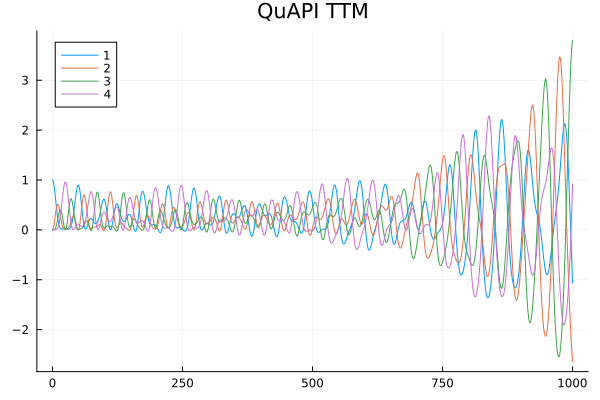

In [8]:
plot(t.*au2fs, real.(ρ[:, 1,1]), label="1")
plot!(t.*au2fs, real.(ρ[:, 2,2]), label="2")
plot!(t.*au2fs, real.(ρ[:, 3,3]), label="3")
plot!(t.*au2fs, real.(ρ[:, 4,4]), title = "QuAPI TTM", label="4")

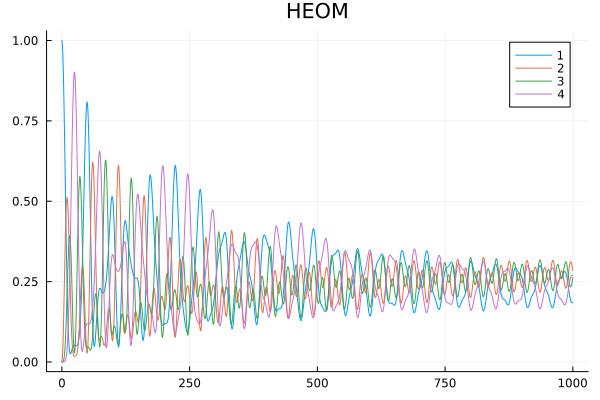

In [10]:
plot(th.*au2fs, real.(ρh[:, 1,1]), label="1")
plot!(th.*au2fs, real.(ρh[:, 2,2]), label="2")
plot!(th.*au2fs, real.(ρh[:, 3,3]), label="3")
plot!(th.*au2fs, real.(ρh[:, 4,4]), title = "HEOM", label="4")